In [106]:
import warnings
import itertools
import pandas as pd
import numpy as np
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [107]:
data= pd.read_csv('/Users/kirtiii/Downloads/batteries.csv')
data.head(10)

,ID,Week,Location,Product,Quantity,Year
0,1000,1,Vancouver,A4 Batteries (4-pack),69,2002
1,1001,2,Vancouver,A4 Batteries (4-pack),115,2002
2,1002,3,Vancouver,A4 Batteries (4-pack),99,2002
3,1003,4,Vancouver,A4 Batteries (4-pack),98,2002
4,1004,5,Vancouver,A4 Batteries (4-pack),102,2002
5,1005,6,Vancouver,A4 Batteries (4-pack),148,2002
6,1006,7,Vancouver,A4 Batteries (4-pack),25,2002
7,1007,8,Vancouver,A4 Batteries (4-pack),134,2002
8,1008,9,Vancouver,A4 Batteries (4-pack),52,2002
9,1009,10,Vancouver,A4 Batteries (4-pack),132,2002


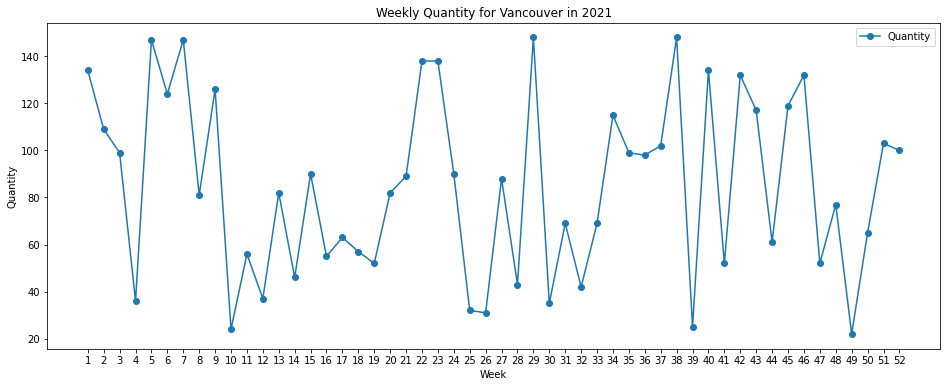

In [108]:
vancouver_data = data[(data['Location'] == 'Vancouver') & (data['Year'] == 2021)]
vancouver_data = vancouver_data[['Week', 'Quantity']]
vancouver_data.set_index('Week', inplace=True)

plt.figure(figsize=(16, 6))
plt.plot(vancouver_data.index, vancouver_data['Quantity'], marker='o', label='Quantity')
plt.title('Weekly Quantity for Vancouver in 2021')
plt.xlabel('Week')
plt.ylabel('Quantity')
plt.xticks(vancouver_data.index)
plt.legend()
plt.show()

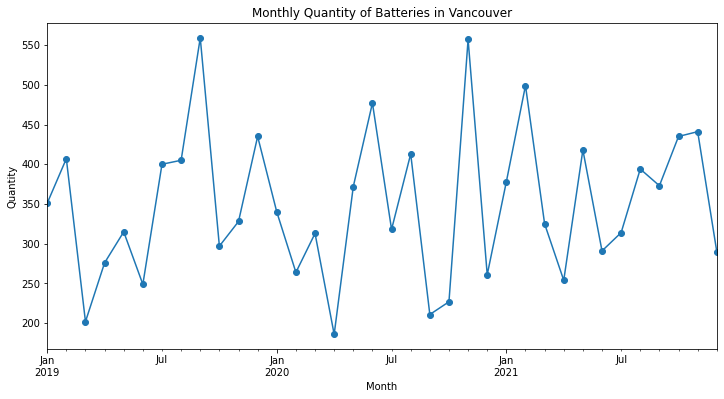

In [109]:
vancouver_data= data[(data['Location']== 'Vancouver')& (data['Year']>=2019)& (data['Year']<= 2021)]
vancouver_data['Date']= vancouver_data['Year'].astype(str)+ '-'+ vancouver_data['Week'].astype(str)+ '-1'
vancouver_data['Date']= pd.to_datetime(vancouver_data['Date'], format='%Y-%W-%w')

vancouver_data.set_index('Date', inplace=True)
vancouver_data.sort_index(inplace=True)
vancouver_data_monthly= vancouver_data['Quantity'].resample('M').sum()

vancouver_data_monthly.plot(figsize= (12, 6), marker= 'o')
plt.ylabel('Quantity')
plt.xlabel('Month')
plt.title('Monthly Quantity of Batteries in Vancouver')
plt.show()

In [110]:
warnings.filterwarnings("ignore")

vancouver_data= data[(data['Location']== 'Vancouver') & (data['Year']< 2021)]
vancouver_data['Date']= vancouver_data['Year'].astype(str)+ '-'+ vancouver_data['Week'].astype(str)+ '-1'
vancouver_data['Date']= pd.to_datetime(vancouver_data['Date'], format='%Y-%W-%w')

vancouver_data.set_index('Date', inplace=True)
vancouver_data.sort_index(inplace=True)

vancouver_data

,ID,Week,Location,Product,Quantity,Year
Date,,,,,,
2002-01-07,1000,1,Vancouver,A4 Batteries (4-pack),69,2002
2002-01-14,1001,2,Vancouver,A4 Batteries (4-pack),115,2002
2002-01-21,1002,3,Vancouver,A4 Batteries (4-pack),99,2002
2002-01-28,1003,4,Vancouver,A4 Batteries (4-pack),98,2002
2002-02-04,1004,5,Vancouver,A4 Batteries (4-pack),102,2002
...,...,...,...,...,...,...
2020-11-30,1983,48,Vancouver,A4 Batteries (4-pack),122,2020
2020-12-07,1984,49,Vancouver,A4 Batteries (4-pack),48,2020
2020-12-14,1985,50,Vancouver,A4 Batteries (4-pack),93,2020


In [111]:
vancouver_2021_data = data[(data['Location'] == 'Vancouver') & (data['Year'] == 2021) & (data['Week'] >= 1) & (data['Week'] <= 52)]
quantity_array = vancouver_2023_data['Quantity'].to_numpy()
print(quantity_array)

[134 109  99  36 147 124 147  81 126  24  56  37  82  46  90  55  63  57
  52  82  89 138 138  90  32  31  88  43 148  35  69  42  69 115  99  98
 102 148  25 134  52 132 117  61 119 132  52  77  22  65 103 100]


In [112]:
warnings.filterwarnings("ignore")
p= d= q= range(0, 2)
seasonal_pdq= [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic= float("inf")
best_params= None
for param in seasonal_pdq:
    try:
        mod= sm.tsa.statespace.SARIMAX(
            vancouver_data['Quantity'],
            order=(3, 0, 3),
            seasonal_order= param,
            enforce_stationarity= False,
            enforce_invertibility= False)
        results= mod.fit()
        if results.aic< best_aic:
            best_aic= results.aic
            best_params= param
    except:
        continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.05539D+00    |proj g|=  2.27608D-01

At iterate    5    f=  5.04899D+00    |proj g|=  8.12131D-01


 This problem is unconstrained.



At iterate   10    f=  5.02527D+00    |proj g|=  4.65865D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     12     26      1     0     0   3.466D-02   5.025D+00
  F =   5.0252496842954733     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.99366D+00    |proj g|=  2.03431D-01

At iterate    5    f=  4.98723D+00    |proj g|=  8.21781D-01


 This problem is unconstrained.



At iterate   10    f=  4.96294D+00    |proj g|=  1.40727D+00

At iterate   15    f=  4.96268D+00    |proj g|=  6.27684D-01

At iterate   20    f=  4.96187D+00    |proj g|=  4.61398D+00

At iterate   25    f=  4.96168D+00    |proj g|=  2.26698D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     25     43      1     0     0   2.267D-02   4.962D+00
  F =   4.9616775904960351     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  5.31143D+00    |proj g|=  4.41099D-02

At iterate   15    f=  5.29720D+00    |proj g|=  2.72001D-01

At iterate   20    f=  5.28410D+00    |proj g|=  7.28720D-02

At iterate   25    f=  5.28368D+00    |proj g|=  1.57970D-03

At iterate   30    f=  5.28355D+00    |proj g|=  7.19684D-02

At iterate   35    f=  5.28158D+00    |proj g|=  4.25089D-02

At iterate   40    f=  5.28149D+00    |proj g|=  2.48626D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     58      1     0     0   8.455D-04   5.281D+00
  F =   5.2814857736620926     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.05238D+00    |proj g|=  1.76793D-01

At iterate    5    f=  5.02343D+00    |proj g|=  5.27064D-02

At iterate   10    f=  5.02232D+00    |proj g|=  4.61801D-02

At iterate   15    f=  5.01124D+00    |proj g|=  8.29949D-02

At iterate   20    f=  5.00644D+00    |proj g|=  2.76506D-02

At iterate   25    f=  5.00223D+00    |proj g|=  1.07520D-01

At iterate   30    f=  4.99787D+00    |proj g|=  5.22171D-02

At iterate   35    f=  4.96698D+00    |proj g|=  2.23843D-01

At iterate   40    f=  4.95070D+00    |proj g|=  8.35112D-02

At iterate   45    f=  4.94177D+00    |proj g|=  1.48153D-01

At iterate   50    f=  4.92800D+00    |proj g|=  4.78180D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.37204D+00    |proj g|=  8.43997D-01

At iterate    5    f=  5.06117D+00    |proj g|=  1.04041D+00

At iterate   10    f=  4.98529D+00    |proj g|=  7.81560D-01

At iterate   15    f=  4.96904D+00    |proj g|=  1.96356D-01

At iterate   20    f=  4.96740D+00    |proj g|=  2.43277D+00

At iterate   25    f=  4.96667D+00    |proj g|=  1.27967D-02

At iterate   30    f=  4.96666D+00    |proj g|=  7.11137D-02

At iterate   35    f=  4.96659D+00    |proj g|=  4.40198D-02

At iterate   40    f=  4.96659D+00    |proj g|=  1.90332D-01

At iterate   45    f=  4.96634D+00    |proj g|=  1.01015D+00

At iterate   50    f=  4.96585D+00    |proj g|=  1.28064D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  4.99351D+00    |proj g|=  1.43535D-01

At iterate   10    f=  4.98360D+00    |proj g|=  2.91595D+00

At iterate   15    f=  4.97313D+00    |proj g|=  1.62371D-01

At iterate   20    f=  4.96534D+00    |proj g|=  2.11130D+00

At iterate   25    f=  4.96205D+00    |proj g|=  2.03502D+00

At iterate   30    f=  4.95920D+00    |proj g|=  3.02755D+00

At iterate   35    f=  4.95909D+00    |proj g|=  2.33463D-01

At iterate   40    f=  4.95886D+00    |proj g|=  4.52217D-02

At iterate   45    f=  4.95883D+00    |proj g|=  4.71652D-02

At iterate   50    f=  4.95871D+00    |proj g|=  1.06999D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.16058D+00    |proj g|=  1.12978D-01

At iterate    5    f=  5.15754D+00    |proj g|=  2.26323D-02

At iterate   10    f=  5.15408D+00    |proj g|=  1.31197D-02

At iterate   15    f=  5.14890D+00    |proj g|=  2.44825D-01

At iterate   20    f=  5.13677D+00    |proj g|=  2.05148D-01

At iterate   25    f=  5.13148D+00    |proj g|=  2.57062D-01

At iterate   30    f=  5.12917D+00    |proj g|=  2.97398D-02

At iterate   35    f=  5.12904D+00    |proj g|=  3.26131D-02

At iterate   40    f=  5.12853D+00    |proj g|=  4.64243D-02

At iterate   45    f=  5.12149D+00    |proj g|=  2.27895D-01

At iterate   50    f=  5.10992D+00    |proj g|=  2.05464D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.05189D+00    |proj g|=  1.76930D-01

At iterate    5    f=  5.02251D+00    |proj g|=  1.54114D-02

At iterate   10    f=  5.02066D+00    |proj g|=  4.22209D-02

At iterate   15    f=  5.00982D+00    |proj g|=  2.11057D-02

At iterate   20    f=  5.00432D+00    |proj g|=  9.86747D-02

At iterate   25    f=  4.98855D+00    |proj g|=  6.53456D-02

At iterate   30    f=  4.92165D+00    |proj g|=  9.25193D-02

At iterate   35    f=  4.91792D+00    |proj g|=  2.23197D-02

At iterate   40    f=  4.91575D+00    |proj g|=  3.52802D-02

At iterate   45    f=  4.91140D+00    |proj g|=  4.44660D-02

At iterate   50    f=  4.91094D+00    |proj g|=  3.64533D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

In [113]:
results.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,-0.0180,0.022,-0.836,0.403,-0.060,0.024
ar.L2,0.0298,0.022,1.380,0.168,-0.013,0.072
ar.L3,0.9005,0.019,47.531,0.000,0.863,0.938
ma.L1,-0.0427,0.279,-0.153,0.879,-0.590,0.505
ma.L2,0.0154,0.267,0.058,0.954,-0.508,0.538
ma.L3,-0.9732,0.272,-3.574,0.000,-1.507,-0.440
ar.S.L12,-0.0203,0.032,-0.639,0.523,-0.082,0.042
ma.S.L12,-1.0029,0.132,-7.609,0.000,-1.261,-0.745
sigma2,1319.4542,431.776,3.056,0.002,473.189,2165.719


In [114]:
final_mod = sm.tsa.statespace.SARIMAX(
    vancouver_data['Quantity'],
    order=(3, 0, 3),
    seasonal_order=best_params,
    enforce_stationarity=False,
    enforce_invertibility=False)
final_results= final_mod.fit()

forecast_periods= 52
forecast= final_results.get_forecast(steps=forecast_periods)
forecast_mean= forecast.predicted_mean

print('Forecasted Quantities for Vancouver (Next {} Weeks):'.format(forecast_periods))
print(forecast_mean)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.05189D+00    |proj g|=  1.76930D-01

At iterate    5    f=  5.02251D+00    |proj g|=  1.54114D-02

At iterate   10    f=  5.02066D+00    |proj g|=  4.22209D-02

At iterate   15    f=  5.00982D+00    |proj g|=  2.11057D-02

At iterate   20    f=  5.00432D+00    |proj g|=  9.86747D-02

At iterate   25    f=  4.98855D+00    |proj g|=  6.53456D-02

At iterate   30    f=  4.92165D+00    |proj g|=  9.25193D-02

At iterate   35    f=  4.91792D+00    |proj g|=  2.23197D-02

At iterate   40    f=  4.91575D+00    |proj g|=  3.52802D-02

At iterate   45    f=  4.91140D+00    |proj g|=  4.44660D-02

At iterate   50    f=  4.91094D+00    |proj g|=  3.64533D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

In [115]:
actual_quantities= quantity_array
mae= mean_absolute_error(actual_quantities, forecast_mean)
mse= mean_squared_error(actual_quantities, forecast_mean)
rmse= math.sqrt(mse)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Absolute Error (MAE): 32.21147536489914
Mean Squared Error (MSE): 1425.417004424204
Root Mean Squared Error (RMSE): 37.75469513086027


In [117]:
vancouver_data_monthly['2021']

Date
2021-01-31    378
2021-02-28    499
2021-03-31    325
2021-04-30    254
2021-05-31    418
2021-06-30    291
2021-07-31    314
2021-08-31    394
2021-09-30    373
2021-10-31    435
2021-11-30    441
2021-12-31    290
Freq: M, Name: Quantity, dtype: int64

In [157]:
copy_forecast= forecast_mean.reset_index(drop= True)
counts= pd.Series(range(1, 53), name= 'week', dtype=int)
year= pd.Series([2021]* 52, name='year', dtype=int)
copy_forecast = pd.concat([counts, year, copy_forecast], axis= 1)

In [160]:
copy_forecast['Date'] = copy_forecast['year'].astype(str) + '-' + copy_forecast['week'].astype(str) + '-1'
copy_forecast['Date'] = pd.to_datetime(copy_forecast['Date'], format='%Y-%W-%w')

copy_forecast.set_index('Date', inplace=True)
copy_forecast.sort_index(inplace=True)
copy_forecast_monthly= copy_forecast['predicted_mean'].resample('M').sum().astype(int)
copy_forecast_monthly

Date
2021-01-31    345
2021-02-28    353
2021-03-31    440
2021-04-30    347
2021-05-31    437
2021-06-30    338
2021-07-31    346
2021-08-31    426
2021-09-30    340
2021-10-31    343
2021-11-30    422
2021-12-31    332
Freq: M, Name: predicted_mean, dtype: int64

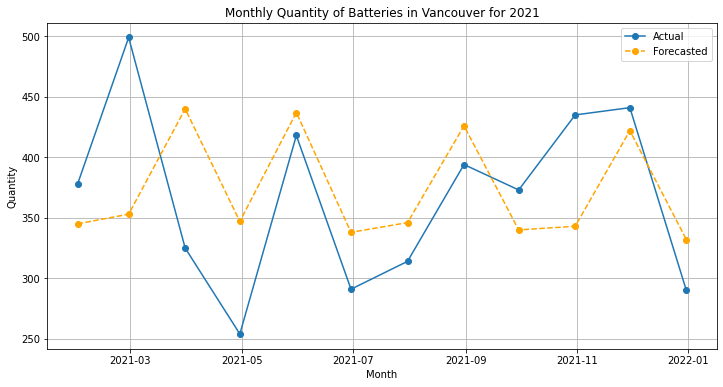

In [164]:
plt.figure(figsize=(12, 6))

plt.plot(vancouver_data_monthly['2021'].index, vancouver_data_monthly['2021'].values, marker='o', label='Actual')
plt.plot(copy_forecast_monthly.index, copy_forecast_monthly.values, marker='o', linestyle='--', color='orange', label='Forecasted')

plt.ylabel('Quantity')
plt.xlabel('Month')
plt.title('Monthly Quantity of Batteries in Vancouver for 2021')
plt.legend()
plt.grid(True)
plt.show()